<a href="https://colab.research.google.com/github/amisha-21/Sentiment-analysis-of-news-Israel-vs-Palestine/blob/main/Israel_Tweet_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Libraries**

In [1]:
!pip install tweet-preprocessor 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import preprocessor as p

In [3]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import plotly

# **2. Loading Datasets**

In [4]:
Israel = pd.read_csv('Israel_Final.csv')

In [5]:
Israel.count() 

date     43953
tweet    43953
dtype: int64

 **Dropping Empty and Duplicate Data**

In [6]:
Israel = Israel.dropna()
Israel = Israel.drop_duplicates()
Israel.count()

date     35481
tweet    35481
dtype: int64

# **3. Preprocessing**

**Data Cleaned to Normal Text and Empty & Duplicate Tweets are removed again**

In [7]:
def preprocess_tweet(row):
    tweet = row['tweet']
    tweet = p.clean(tweet)
    return tweet

In [8]:
Israel['tweet'] = Israel.apply(preprocess_tweet, axis=1)

In [9]:
Israel.head()

,date,tweet
0,5/20/2021,He says Israel has control over media and CNN ...
1,5/20/2021,Send UN troops to Israel and get rid of US. UN...
2,5/20/2021,I wish you had cited is a organization. I have...
3,5/20/2021,Ya jauh sekali kemenangan total. Tp apa pencap...
4,5/20/2021,SpaceX Introduces New Reusable Rockets That Is...


In [10]:
Israel = Israel.dropna()
Israel = Israel.drop_duplicates()
Israel.count()

date     32882
tweet    32882
dtype: int64

**Normal text preprocessing like**

*   Stopwords removal 
*  Replace extra white spaces
*  Punctuation Removal
*   Lowercasing






In [11]:
pip install --upgrade gensim

In [12]:
from gensim.parsing.preprocessing import remove_stopwords

In [13]:
def stopword_removal(row):
    tweet = row['tweet']
    tweet = remove_stopwords(tweet)
    return tweet

In [14]:
Israel['tweet'] = Israel.apply(stopword_removal, axis=1)

In [15]:
Israel['tweet'] = Israel['tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

# **4. Tokenization**

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize
Israel['tweet'] = Israel['tweet'].apply(word_tokenize)

# **5.Stemming**

In [18]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):       
    return " ".join([stemmer.stem(word) for word in text])
Israel['tweet'] = Israel['tweet'].apply(lambda text: stem_words(text))

# **6. Lexicon Based Sentiment Calculation**

In [19]:
from textblob import TextBlob

In [20]:
Israel['polarity'] = Israel['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
Israel['subjectivity'] = Israel['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [21]:
def getAnalysis(score):
   if score < 0:
    return '-1'
   elif score == 0:
     return '0'
   else:
     return '1'
Israel['Analysis'] = Israel['polarity'].apply(getAnalysis)
  

In [22]:
Israel.head()

,date,tweet,polarity,subjectivity,Analysis
0,5/20/2021,he say israel control media cnn hostess say it...,0.000000,0.000000,0
1,5/20/2021,send un troop israel rid us un headquart us im...,0.000000,0.000000,0
2,5/20/2021,i wish cite organ i watch time amp excus occup...,0.000000,0.333333,0
3,5/20/2021,ya jauh sekali kemenangan total tp apa pencapa...,0.000000,0.750000,0
4,5/20/2021,spacex introduc new reusabl rocket that israel...,0.068182,0.227273,1


In [23]:
Israel.tail()

,date,tweet,polarity,subjectivity,Analysis
43525,05-09-2021,not side pro palestinian terror incit call isr...,0.000000,0.000000,0
43526,05-09-2021,all indian support our brotherhood israel isra...,-0.166667,0.533333,-1
43527,05-08-2021,these goyim realiti villag loft hazak isf,0.000000,0.000000,0
43528,05-06-2021,when end our kid murder simpli jew and happen ...,0.100000,0.200000,1
43529,05-10-2021,ilhan omar support terror rt agre,0.000000,0.000000,0


# **7. Word Embedding (Bag of Words)**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer( min_df=2,max_features=100000)
bow.fit(Israel['tweet'])
Israel_processed = bow.transform(Israel['tweet']).toarray()

# **8. Splitting of Datasets**

In [25]:
y = Israel.drop(labels= ['polarity', 'subjectivity','date','tweet'], axis=1)
X = Israel.drop(labels= ['Analysis','date','tweet'],axis=1)

In [26]:
y

,Analysis
0,0
1,0
2,0
3,0
4,1
...,...
43525,0
43526,-1
43527,0
43528,1


In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_test

,polarity,subjectivity
29948,0.285714,0.535714
40330,0.133333,0.533333
43320,0.043182,0.450000
1087,0.295455,0.633333
835,0.000000,0.000000
...,...,...
23446,0.285714,0.535714
842,0.100000,0.275000
17590,0.000000,0.000000
10334,-0.800000,0.900000


In [28]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 29948 to 22167
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Analysis  6577 non-null   object
dtypes: object(1)
memory usage: 102.8+ KB


# **9. Model Prediction**

In [29]:
from sklearn.naive_bayes import BernoulliNB
 
#Calling the Class
NBC = BernoulliNB()
 
#Fitting the data to the classifier
NBC.fit(X_train , y_train.values.ravel())

BernoulliNB()

In [30]:
#Predict on test data
y_pred = NBC.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[ 968   81    0]
 [ 367 3302    0]
 [   0    0 1859]]
              precision    recall  f1-score   support

          -1       0.73      0.92      0.81      1049
           0       0.98      0.90      0.94      3669
           1       1.00      1.00      1.00      1859

    accuracy                           0.93      6577
   macro avg       0.90      0.94      0.92      6577
weighted avg       0.94      0.93      0.93      6577

0.9318838376159343


# **10. Visualization**

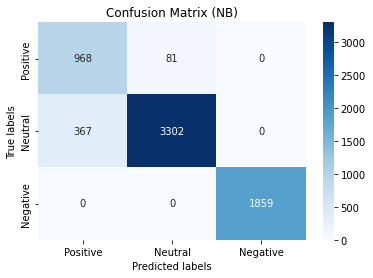

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (NB)');
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative']);